In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from pyfolio.timeseries import perf_stats
import sys
sys.path.append('/home/tomek/ib_tools')
from blotter import MongoBlotter
%matplotlib inline

In [25]:
cash = 109394
df = MongoBlotter().read()
df.tail(30)

,_id,sys_time,time,contract,action,amount,price,exec_ids,order_id,perm_id,reason,commission,realizedPNL
370,5f40234dab7edc8f0e3151cb,2020-08-21 21:41:01.914,2020-08-21 19:41:01.911,NQU0,SELL,3.0,11542.833333,"[0000e1a7.5f3faa42.01.01, 0000e1a7.5f3faa43.01...",78,1051676647,STOP-LOSS,6.30,-362.60
371,5f40235cab7edc8f0e3151cc,2020-08-21 21:41:16.860,2020-08-21 19:41:16.858,MNQU0,SELL,3.0,11542.500000,[0000e1a7.5f3faa4c.01.01],77,1051676646,STOP-LOSS,1.41,-32.82
372,5f48024d0b06e6e56accaabb,2020-08-27 20:58:21.765,2020-08-27 18:58:21.760,NQU0,SELL,1.0,11961.750000,[0000e1a7.5f47e774.01.01],-3,2141716104,MANUAL TRADE,2.10,0.00
373,5f48027e0b06e6e56accaabc,2020-08-27 20:59:10.623,2020-08-27 18:59:10.619,NQU0,BUY,1.0,11961.000000,[0000e1a7.5f47e791.01.01],-4,2141716114,MANUAL TRADE,2.10,10.80
374,5f5246daf2a5ab6f74f19ae0,2020-09-04 15:53:30.961,2020-09-04 13:53:30.951,NQU0,SELL,1.0,11597.750000,[0000e1a7.5f5218c0.01.01],93,1940011922,CLOSE,2.10,-3039.20
375,5f524771f2a5ab6f74f19ae1,2020-09-04 15:56:01.258,2020-09-04 13:56:01.235,MNQU0,SELL,1.0,11516.000000,[0000e1a7.5f521dd5.01.01],95,1940011929,ENTRY,0.47,0.00
376,5f524773f2a5ab6f74f19ae2,2020-09-04 15:56:03.146,2020-09-04 13:56:03.062,NQU0,SELL,1.0,11520.750000,[0000e1a7.5f521dde.01.01],94,1940011925,ENTRY,2.10,0.00
377,5f524895f2a5ab6f74f19aeb,2020-09-04 16:00:53.850,2020-09-04 14:00:53.849,MNQU0,BUY,1.0,11556.250000,[0000e1a7.5f522359.01.01],96,1940011930,STOP-LOSS,0.47,-81.44
378,5f524896f2a5ab6f74f19aec,2020-09-04 16:00:54.091,2020-09-04 14:00:54.085,NQU0,BUY,1.0,11555.750000,[0000e1a7.5f52235a.01.01],97,1940011931,STOP-LOSS,2.10,-704.20
379,5f524b6cf2a5ab6f74f19af5,2020-09-04 16:13:00.899,2020-09-04 14:13:00.896,MNQU0,SELL,1.0,11504.250000,[0000e1a7.5f522f3a.01.01],99,1940011937,ENTRY,0.47,0.00


In [3]:
#del df['sys_time']
del df['exec_ids']
del df['perm_id']
del df['_id']
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df['cash'] = df.realizedPNL.cumsum() + cash
df['contract'] = df['contract'].apply(lambda x: x[:-2])
micro_contracts = df[df.contract.str.startswith('M')]
macro_contracts = df[~df.contract.str.startswith('M')]
micro_contracts['amount'] /= 10
df = pd.concat([macro_contracts, micro_contracts]).sort_index()
df.contract = df.contract.str.strip('M')
df['contract'] = df['contract'].apply(lambda x: x[:2])
df.contract = df.contract.str.strip()

In [4]:
df.tail()

,sys_time,contract,action,amount,price,order_id,reason,commission,realizedPNL,cash
time,,,,,,,,,,
2020-09-04 14:39:01.242,2020-09-04 16:39:01.246,NQ,SELL,0.1,11274.00,118,ENTRY,0.47,0.00,126105.460001
2020-09-04 14:39:03.372,2020-09-04 16:39:03.488,YM,SELL,0.1,27823.00,116,ENTRY,0.47,0.00,126105.460001
2020-09-04 14:39:03.595,2020-09-04 16:39:03.597,NQ,SELL,1.0,11272.75,117,ENTRY,2.10,0.00,126105.460001
2020-09-04 14:45:21.366,2020-09-04 16:45:21.377,NQ,BUY,0.1,11197.50,120,STOP-LOSS,0.47,152.06,126257.520001
2020-09-04 14:45:21.571,2020-09-04 16:45:21.579,NQ,BUY,1.0,11198.00,122,STOP-LOSS,2.10,1490.80,127748.320001


In [5]:
c = set(df['contract'])
allocs = pd.Series([1/len(c)]*len(c) +[1], index=list(c) + ['total'])
#allocs = pd.Series([1/3, 2/3, 1], index=['ES','NQ', 'total'])

In [6]:
allocs

ES       0.25
NQ       0.25
GC       0.25
YM       0.25
total    1.00
dtype: float64

In [7]:
df.groupby('contract').realizedPNL.sum()

contract
ES    -4680.800000
GC    10489.300001
NQ    10578.620000
YM     1967.200000
Name: realizedPNL, dtype: float64

In [8]:
df.realizedPNL.sum()

18354.320001

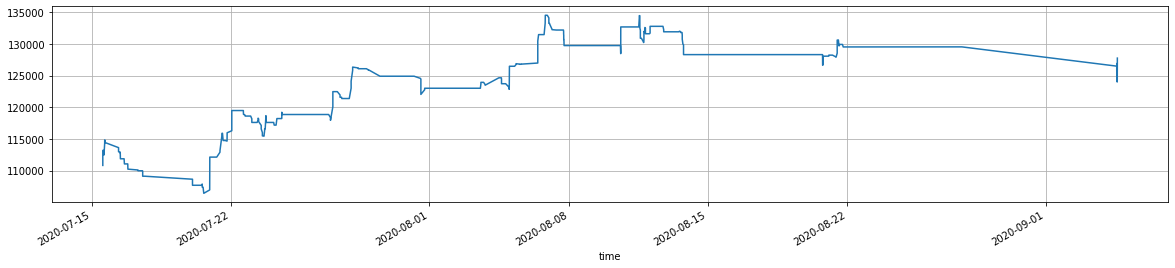

In [9]:
df.cash.plot(figsize=(20,4), grid=True);

In [10]:
by_contract = pd.pivot_table(df, values='realizedPNL', index=df.index, columns=['contract'])
by_contract['total'] = by_contract.sum(axis=1)

In [11]:
# number of trades
trades = df.groupby('contract').action.count()
trades, trades.sum()

(contract
 ES     52
 GC    118
 NQ    195
 YM     35
 Name: action, dtype: int64,
 400)

In [12]:
# trades per day
days = len(by_contract.resample('B').count().index)
trades/days, trades.sum()/days

(contract
 ES    1.368421
 GC    3.105263
 NQ    5.131579
 YM    0.921053
 Name: action, dtype: float64,
 10.526315789473685)

In [13]:
# commission paid
df.groupby('contract').commission.sum()

contract
ES    133.04
GC    293.95
NQ    382.72
YM    101.95
Name: commission, dtype: float64

In [14]:
df.commission.sum()

911.6600000000001

In [15]:
# per trade stats (pro rated per macro contract)
exits = df[df.realizedPNL!=0]
dfs = {}
for contract in exits.contract.unique():
    dfs[contract] = exits[exits.contract == contract]
dfs['total'] = exits
results = pd.DataFrame(columns=['success_rate', 'average_PNL', 'average_gain', 'average_loss', 
                                'win_ratio', 'EV/contract', 'number_of_contracts'])
for c, d in dfs.items():
    row = pd.Series()
    row['success_rate'] = round((d[d.realizedPNL > 0]).realizedPNL.count() / d.realizedPNL.count(), 2)
    d['pnl_per_contract'] = d.realizedPNL / d.amount
    row['average_PNL'] = round(d['pnl_per_contract'].mean(), 2)
    row['average_gain'] = round((d[d.realizedPNL > 0])['pnl_per_contract'].mean(), 2)
    row['average_loss'] = round((d[d.realizedPNL < 0])['pnl_per_contract'].mean(), 2)
    row['win_ratio'] = round(abs(row['average_gain'] / row['average_loss']), 2)
    row['EV/contract'] = round((row['average_gain'] * row['success_rate']) + (
        row['average_loss'] * (1 - row['success_rate'])), 2)
    row['number_of_contracts'] = d.amount.sum()
    results.loc[c] = row
results

,success_rate,average_PNL,average_gain,average_loss,win_ratio,EV/contract,number_of_contracts
YM,0.39,161.44,1429.29,-645.38,2.21,163.74,20.5
NQ,0.44,181.05,1072.83,-512.55,2.09,185.02,71.2
ES,0.25,-161.79,1081.57,-576.24,1.88,-161.79,25.0
GC,0.39,213.34,1446.68,-561.91,2.57,221.44,47.1
total,0.39,146.48,1212.73,-549.29,2.21,137.90,163.8


In [16]:
daily = by_contract.resample('B').sum()
daily = daily /  (allocs * cash)
#daily[['CL', 'ES', 'GC', 'NQ']].plot(figsize=(20,8), grid=True);

In [17]:
# instrument correlations
log_returns = np.log(daily + 1)
log_returns.corr()

,ES,GC,NQ,YM,total
ES,1.000000,0.109455,-0.285881,0.353475,0.403338
GC,0.109455,1.000000,0.024852,-0.034641,0.554498
NQ,-0.285881,0.024852,1.000000,0.126226,0.530718
YM,0.353475,-0.034641,0.126226,1.000000,0.617102
total,0.403338,0.554498,0.530718,0.617102,1.000000


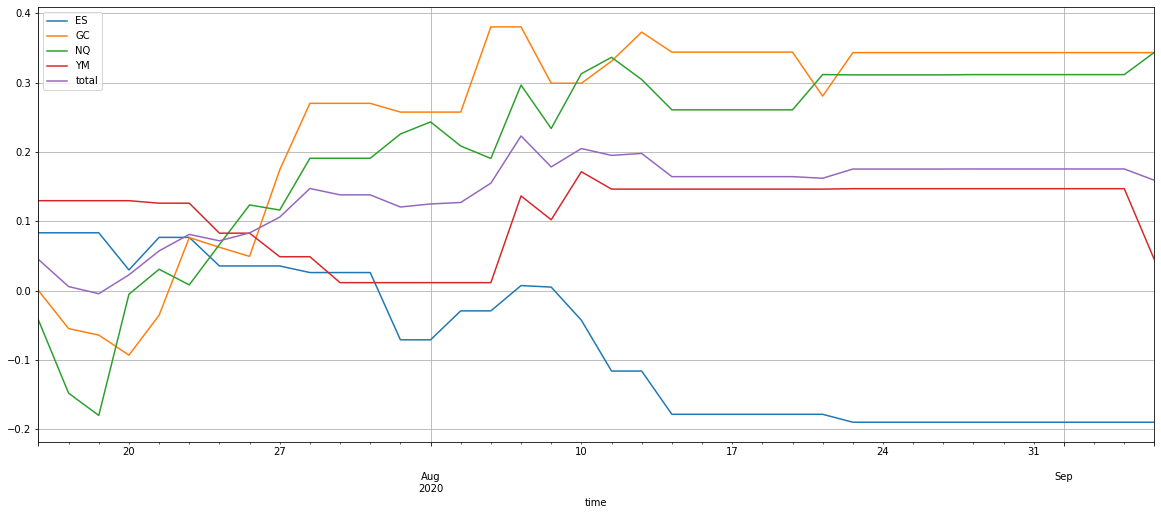

In [18]:
log_returns.cumsum().plot(figsize=(20,8), grid=True);

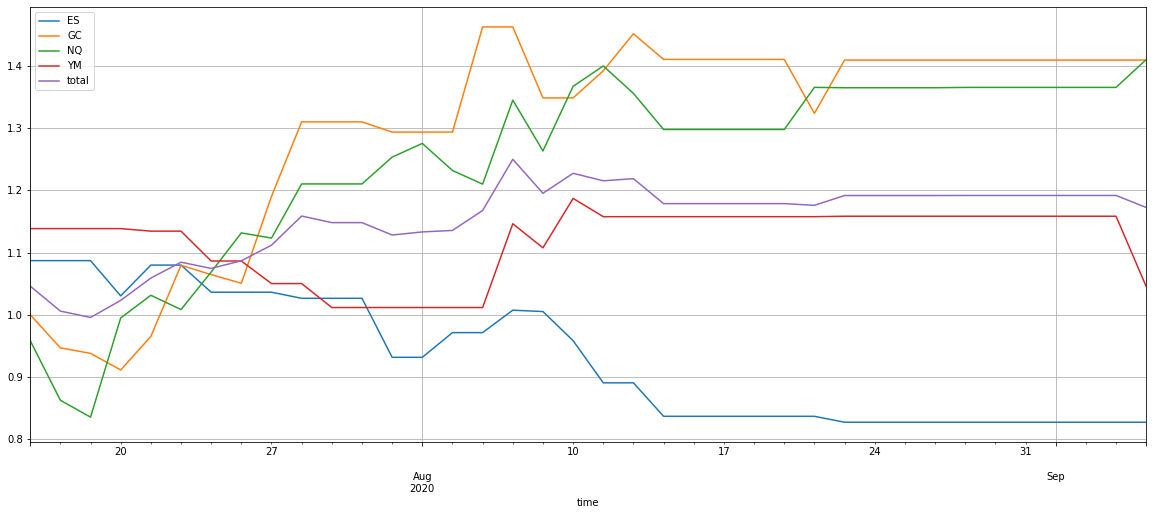

In [19]:
returns = daily.copy()
returns_index = (returns + 1).cumprod()
returns_index.plot(figsize=(20,8), grid=True);

In [20]:
stats = pd.DataFrame()
for col in daily.columns:
    stats[col] = perf_stats(daily[col])
stats

,ES,GC,NQ,YM,total
Annual return,-0.716330,8.746390,8.779846,0.341807,1.872742
Cumulative returns,-0.173034,0.409650,0.410379,0.045333,0.172488
Annual volatility,0.497118,0.741417,0.797662,0.625853,0.354907
Sharpe ratio,-2.283198,3.430578,3.243120,0.762183,3.150401
Calmar ratio,-2.994850,91.973612,53.257829,2.862215,30.206550
Stability,0.879622,0.637901,0.716599,0.147559,0.592621
Max drawdown,-0.239187,-0.095097,-0.164855,-0.119420,-0.061998
Omega ratio,0.556662,2.283607,1.998955,1.264205,1.890503
Sortino ratio,-2.846371,8.073272,6.881060,1.485255,5.903918
Skew,-0.256184,1.204173,1.226805,1.751781,0.541547


In [21]:
# monthly returns in percent
monthly_log_returns = log_returns.resample('M').sum()
monthly_returns = np.exp(monthly_log_returns)-1
round(monthly_returns, 4) * 100

,ES,GC,NQ,YM,total
time,,,,,
2020-07-31,-6.86,29.38,25.35,1.15,12.82
2020-08-31,-11.21,8.96,8.95,14.52,5.64
2020-09-30,0.00,0.00,3.27,-9.76,-1.62


In [22]:
# total returns by contract in percent
round(np.exp(monthly_log_returns.sum())-1, 2)* 100

ES      -17.0
GC       41.0
NQ       41.0
YM        5.0
total    17.0
dtype: float64

In [23]:
df.sort_values('realizedPNL', ascending=False)[['contract', 'action', 'price', 'realizedPNL']]

,contract,action,price,realizedPNL
time,,,,
2020-07-20 22:44:06.883,NQ,SELL,10934.00,5180.80
2020-08-06 10:49:16.287,YM,SELL,27017.00,3471.60
2020-07-22 01:17:38.552,GC,SELL,1860.40,3190.32
2020-08-05 00:35:18.941,GC,SELL,2036.30,2815.16
2020-07-21 13:30:08.703,GC,SELL,1837.40,2510.32
...,...,...,...,...
2020-08-13 18:51:02.284,ES,SELL,3362.00,-1550.10
2020-08-11 14:08:01.174,ES,SELL,3355.75,-1758.40
2020-07-31 13:39:29.153,ES,SELL,3245.25,-2408.40


In [24]:
daily.sort_values('total', ascending=False)

,ES,GC,NQ,YM,total
time,,,,,
2020-08-06,0.037172,0.000000,0.111660,0.133267,0.070525
2020-07-15,0.086951,0.000000,-0.041694,0.138478,0.045934
2020-07-28,-0.009478,0.100648,0.077581,0.000000,0.042188
2020-07-21,0.048123,0.059194,0.036711,-0.003575,0.035113
2020-08-05,0.000000,0.130831,-0.017782,0.000000,0.028262
2020-07-20,-0.052202,-0.028497,0.191042,0.000000,0.027586
2020-08-10,-0.046631,0.000000,0.082316,0.071804,0.026872
2020-07-22,0.000000,0.118659,-0.022251,0.000000,0.024102
2020-07-27,0.000000,0.133071,-0.007373,-0.033426,0.023068
